c:\Users\sanke\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(



Cluster Centers:
[[1164149.        ]
 [  27570.41724942]
 [ 175791.45283019]
 [1871557.        ]
 [ 673469.42857143]]

Clustered Data:
   total_graduates  Cluster
0            16287        1
1             8863        1
2            10565        1
3            19225        1
4            11902        1


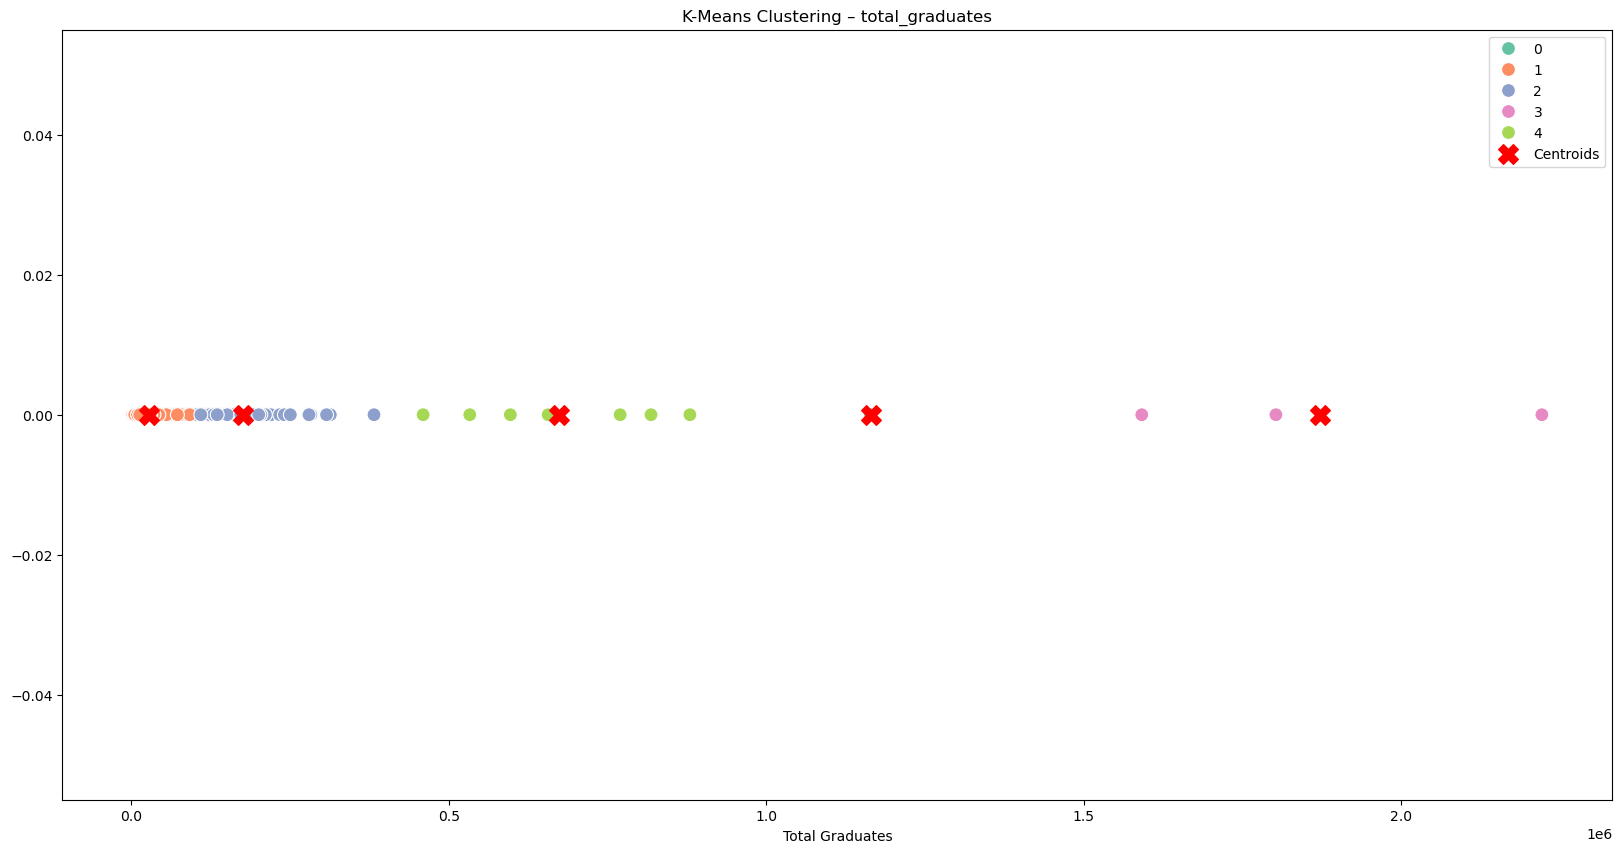

In [3]:
# K-Means Clustering – Cities_r2.csv
# Feature: total_graduates

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# -----------------------------
# Load & Preprocess Dataset
# -----------------------------
df = pd.read_csv("cities_r2.csv")

# Encode categorical columns if necessary
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Select the feature for clustering
X = df[["total_graduates"]]

# -----------------------------
# Apply K-Means
# -----------------------------
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# -----------------------------
# Results
# -----------------------------
print("\nCluster Centers:")
print(kmeans.cluster_centers_)

print("\nClustered Data:")
print(df[["total_graduates", "Cluster"]].head())

# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(20,10))
sns.scatterplot(x="total_graduates", y=[0]*len(df), hue="Cluster", data=df, palette="Set2", s=100)
plt.scatter(kmeans.cluster_centers_, [0]*len(kmeans.cluster_centers_), color="red", s=200, marker="X", label="Centroids")
plt.title("K-Means Clustering – total_graduates")
plt.xlabel("Total Graduates")
plt.legend()
plt.show()
